In [332]:
import librosa
import numpy as np
from pydub import AudioSegment
from sklearn import preprocessing
from matplotlib import pyplot as plt
from scipy import signal

In [333]:
pathAudio = 'C:/Users/Admin/Downloads/Technology Lab/sampling/in-1sec/'
files = librosa.util.find_files(pathAudio, ext=['wav'])
files = sorted(files, key=lambda x: int(x.split('_')[-1].split(".")[0]))
samples = []
for file_name in files:
    loaded_audio_file = AudioSegment.from_wav(file_name)
    numeric_sample_array = loaded_audio_file.get_array_of_samples()
    resampled_part = signal.resample(numeric_sample_array, 882)
    samples.append(resampled_part)
samples = np.array(samples)
samples.shape

(222, 882)

In [334]:
print(samples.max())
print(samples.min())

30675.171490352477
-30481.686283496667


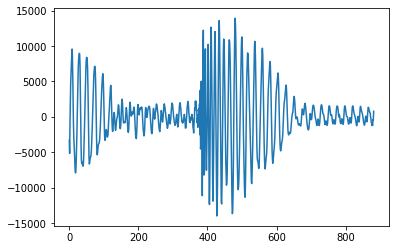

In [335]:
examp_samp = samples[32]

plt.figure(1)
plt.plot(examp_samp)
plt.show()

In [336]:
min_max_scaler = preprocessing.MinMaxScaler()
normalized_samples = min_max_scaler.fit_transform(samples)
normalized_samples.shape

(222, 882)

In [337]:
print(normalized_samples.max())
print(normalized_samples.min())

1.0000000000000002
0.0


In [338]:
normalized_samples = normalized_samples.reshape(222, 882, 1)
normalized_samples.shape

(222, 882, 1)

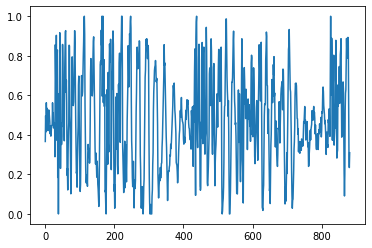

In [339]:
examp_samp = normalized_samples[33]

plt.figure(1)
plt.plot(examp_samp)
plt.show()

In [340]:
y_train = np.array(range(1, 223))
y_train.shape

(222,)

In [341]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

model = Sequential()
model.add(Conv1D(8, kernel_size=3, activation='relu', input_shape=(882, 1)))
model.add(Flatten())
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(normalized_samples, y_train, epochs=10, batch_size=1000)

Epoch 1/10
1/1 [==============================] - 0s 272ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accur

In [342]:
model_2 = Sequential()
model_2.add(Conv1D(8, kernel_size=3, activation='relu', input_shape=(882, 1), weights=model.layers[0].get_weights()))
pred = model_2.predict(examp_samp.reshape(1, 882, 1))

1/1 [==============================] - 0s 25ms/step


In [343]:
pred.shape

(1, 880, 8)

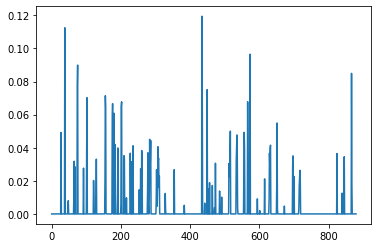

In [344]:
plt.plot(pred[0][:,7])
plt.show()

In [346]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

model_3 = Sequential()
model_3.add(Conv1D(8, kernel_size=3, activation='relu', input_shape=(882, 1)))
model_3.add(MaxPooling1D(pool_size=3))
model_3.add(Flatten())
model_3.add(Dense(1, activation='softmax'))

model_3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model_3.fit(normalized_samples, y_train, epochs=10, batch_size=1000)

Epoch 1/10
1/1 [==============================] - 0s 271ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 7/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0045
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accur

In [347]:
model_4 = Sequential()
model_4.add(Conv1D(8, kernel_size=3, activation='relu', input_shape=(882, 1), weights=model_3.layers[0].get_weights()))
model_4.add(MaxPooling1D(pool_size=3, weights=model_3.layers[1].get_weights()))
pred_2 = model_4.predict(examp_samp.reshape(1, 882, 1))

1/1 [==============================] - 0s 29ms/step


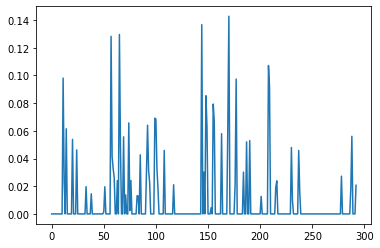

In [348]:
plt.plot(pred_2[0][:,3])
plt.show()

In [349]:
normalized_samples

array([[[0.61667124],
        [0.47142056],
        [0.44955661],
        ...,
        [0.47768385],
        [0.52142047],
        [0.57399049]],

       [[0.6349488 ],
        [0.46073396],
        [0.42360776],
        ...,
        [0.48594678],
        [0.51401949],
        [0.56665397]],

       [[0.49159644],
        [0.57006881],
        [0.53264748],
        ...,
        [0.47396907],
        [0.44308665],
        [0.37599902]],

       ...,

       [[0.59412684],
        [0.46576546],
        [0.45523711],
        ...,
        [0.46959795],
        [0.49485747],
        [0.54438159]],

       [[0.62002502],
        [0.47060833],
        [0.4505784 ],
        ...,
        [0.46849617],
        [0.49860474],
        [0.5386492 ]],

       [[0.59616084],
        [0.47344184],
        [0.44844394],
        ...,
        [0.47062554],
        [0.49467703],
        [0.54357459]]])

In [350]:
all_samples = normalized_samples.reshape(195804, 1)
all_samples

array([[0.61667124],
       [0.47142056],
       [0.44955661],
       ...,
       [0.47062554],
       [0.49467703],
       [0.54357459]])

In [351]:
import pandas as pd
frami = pd.DataFrame(columns=['actual'], data=all_samples)
frami

,actual
0,0.616671
1,0.471421
2,0.449557
3,0.553337
4,0.479708
...,...
195799,0.515698
195800,0.447553
195801,0.470626
195802,0.494677


In [352]:
frami['next'] = frami['actual'].shift(-1)
frami

,actual,next
0,0.616671,0.471421
1,0.471421,0.449557
2,0.449557,0.553337
3,0.553337,0.479708
4,0.479708,0.503400
...,...,...
195799,0.515698,0.447553
195800,0.447553,0.470626
195801,0.470626,0.494677
195802,0.494677,0.543575


In [353]:
frami = frami.dropna()
next = frami['next']
next

0         0.471421
1         0.449557
2         0.553337
3         0.479708
4         0.503400
            ...   
195798    0.515698
195799    0.447553
195800    0.470626
195801    0.494677
195802    0.543575
Name: next, Length: 195803, dtype: float64

In [354]:
X = []
Y = []
for i in range(0, len(next)-880):
    Y.append(next[i+880:i+900])
    X.append(np.array(next[i:i+880]))
X = np.array(X)
Y = np.array(Y)
X.shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_22944\566132139.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array(Y)


(194923, 880)

In [355]:
Y.shape

(194923,)

In [356]:
X[0][-20:]

array([0.55034309, 0.51409474, 0.47352941, 0.47331587, 0.4545018 ,
       0.44565993, 0.47950107, 0.52875299, 0.48003646, 0.47080133,
       0.47366322, 0.54835961, 0.49325883, 0.51014748, 0.47995395,
       0.50492359, 0.50242779, 0.43726338, 0.47768385, 0.52142047])

In [357]:
Y[0][:20]

880    0.573990
881    0.634949
882    0.460734
883    0.423608
884    0.528944
885    0.474824
886    0.508606
887    0.441954
888    0.454678
889    0.394707
890    0.490645
891    0.542028
892    0.523677
893    0.504576
894    0.452456
895    0.416943
896    0.450066
897    0.430235
898    0.417183
899    0.468790
Name: next, dtype: float64

In [360]:
frami[880:920]

,actual,next
880,0.521420,0.573990
881,0.573990,0.634949
882,0.634949,0.460734
883,0.460734,0.423608
884,0.423608,0.528944
885,0.528944,0.474824
886,0.474824,0.508606
887,0.508606,0.441954
888,0.441954,0.454678
889,0.454678,0.394707


In [361]:
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100, input_shape=(880, 1), return_sequences=True, stateful=True, batch_size=100, activation='sigmoid'))
#model.add(Dense(80))
#model.add(LSTM(40, return_sequences=True, stateful=True, batch_size=100))
model.add(Dense(20))

model.compile(optimizer='rmsprop', loss='mse')

In [362]:
model.fit(X, Y, batch_size=10, epochs=10)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Series).